In [2]:
## PREPROCESSING THE DATASET

In [3]:
# Import libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt_tab')

# Load all csv files of GoEmotions
pt1 = pd.read_csv("goemotions_1.csv")
pt2 = pd.read_csv("goemotions_2.csv")
pt3 = pd.read_csv("goemotions_3.csv")

# Combine the three parts into a single df
df = pd.concat([pt1, pt2, pt3], ignore_index=True)

# Define the emotion columns in binary labes
emotion_columns = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

# Assign a primary emotion to each entry
def get_primary_emotion(row):
    emotions = row[emotion_columns]
    emotion_list = emotions[emotions == 1].index.tolist()
    for emotion in emotion_columns:
        if emotion_list:
            return emotion_list[0]
        return 'neutral'

df['emotion'] = df.apply(get_primary_emotion, axis=1)

# Clean and preprocess text through NLTK
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercase and tokenize
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    tokens = [w for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess_text)

# Preview outcome
df[['text', 'clean_text', 'emotion']].head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,clean_text,emotion
0,That game hurt.,game hurt,sadness
1,>sexuality shouldn’t be a grouping category I...,sexuality shouldnt grouping category makes dif...,neutral
2,"You do right, if you don't care then fuck 'em!",right dont care fuck em,neutral
3,Man I love reddit.,man love reddit,love
4,"[NAME] was nowhere near them, he was by the Fa...",name nowhere near falcon,neutral
5,Right? Considering it’s such an important docu...,right considering important document know damn...,gratitude
6,"He isn't as big, but he's still quite popular....",isnt big hes still quite popular ive heard thi...,disapproval
7,That's crazy; I went to a super [RELIGION] hig...,thats crazy went super religion high school th...,amusement
8,that's adorable asf,thats adorable asf,amusement
9,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",sponge blurb pubs quaw haha gurr ha aaa finale...,amusement


In [6]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Create a CountVectorizer
vectorizer = CountVectorizer(max_features=5000)

# Transform the text data
X = vectorizer.fit_transform(df['clean_text'])

# Prepare the target variable
y = df['emotion']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
## Logistic Regression Model

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=y.unique()))

Accuracy: 0.40433187359450823

Classification Report:
                precision    recall  f1-score   support

       sadness       0.50      0.52      0.51      3456
       neutral       0.53      0.60      0.56      1824
          love       0.35      0.27      0.30      1596
     gratitude       0.24      0.11      0.15      2406
   disapproval       0.27      0.11      0.15      3005
     amusement       0.26      0.14      0.18       980
disappointment       0.28      0.10      0.15      1318
    admiration       0.34      0.09      0.14      1541
   realization       0.36      0.19      0.25       606
     annoyance       0.24      0.10      0.14      1327
     confusion       0.18      0.06      0.09      1797
      optimism       0.34      0.19      0.24       690
     curiosity       0.37      0.16      0.23       345
    excitement       0.32      0.14      0.19       866
        caring       0.41      0.36      0.38       483
       disgust       0.65      0.72      0.68    

In [10]:
## Support Vector Machine (SVM)

# Import libraries
from sklearn.svm import LinearSVC

# SVM Model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Predict and evaluate
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred, target_names=y.unique()))

SVM Accuracy: 0.4055864599360871

SVM Classification Report:
                precision    recall  f1-score   support

       sadness       0.49      0.53      0.51      3456
       neutral       0.52      0.64      0.57      1824
          love       0.34      0.29      0.31      1596
     gratitude       0.24      0.09      0.13      2406
   disapproval       0.29      0.08      0.13      3005
     amusement       0.26      0.12      0.17       980
disappointment       0.30      0.08      0.13      1318
    admiration       0.38      0.08      0.13      1541
   realization       0.37      0.20      0.26       606
     annoyance       0.26      0.07      0.12      1327
     confusion       0.21      0.05      0.08      1797
      optimism       0.30      0.20      0.24       690
     curiosity       0.31      0.17      0.22       345
    excitement       0.32      0.13      0.18       866
        caring       0.39      0.38      0.38       483
       disgust       0.64      0.73      0

In [8]:
# Random Forest Model

# Import libraries
from sklearn.ensemble import RandomForestClassifier

# RF Model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred, target_names=y.unique()))

Random Forest Accuracy: 0.3654870398863771

Random Forest Classification Report:
                precision    recall  f1-score   support

       sadness       0.50      0.52      0.51      3456
       neutral       0.47      0.51      0.49      1824
          love       0.31      0.29      0.30      1596
     gratitude       0.20      0.19      0.19      2406
   disapproval       0.22      0.21      0.22      3005
     amusement       0.24      0.24      0.24       980
disappointment       0.25      0.22      0.24      1318
    admiration       0.32      0.28      0.30      1541
   realization       0.24      0.23      0.24       606
     annoyance       0.16      0.14      0.15      1327
     confusion       0.22      0.19      0.20      1797
      optimism       0.23      0.20      0.22       690
     curiosity       0.20      0.18      0.19       345
    excitement       0.23      0.19      0.21       866
        caring       0.36      0.35      0.35       483
       disgust       0

<ipython-input-11-fbde8795ded0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='Set2')


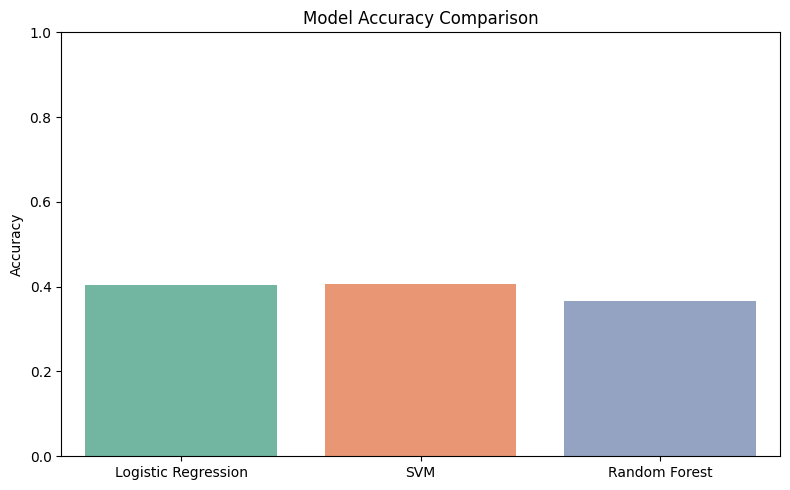

In [11]:
# Store accuracies for comparison
model_names = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, rf_pred)
]

# Plot accuracy comparison
plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=accuracies, palette='Set2')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.tight_layout()
plt.show()

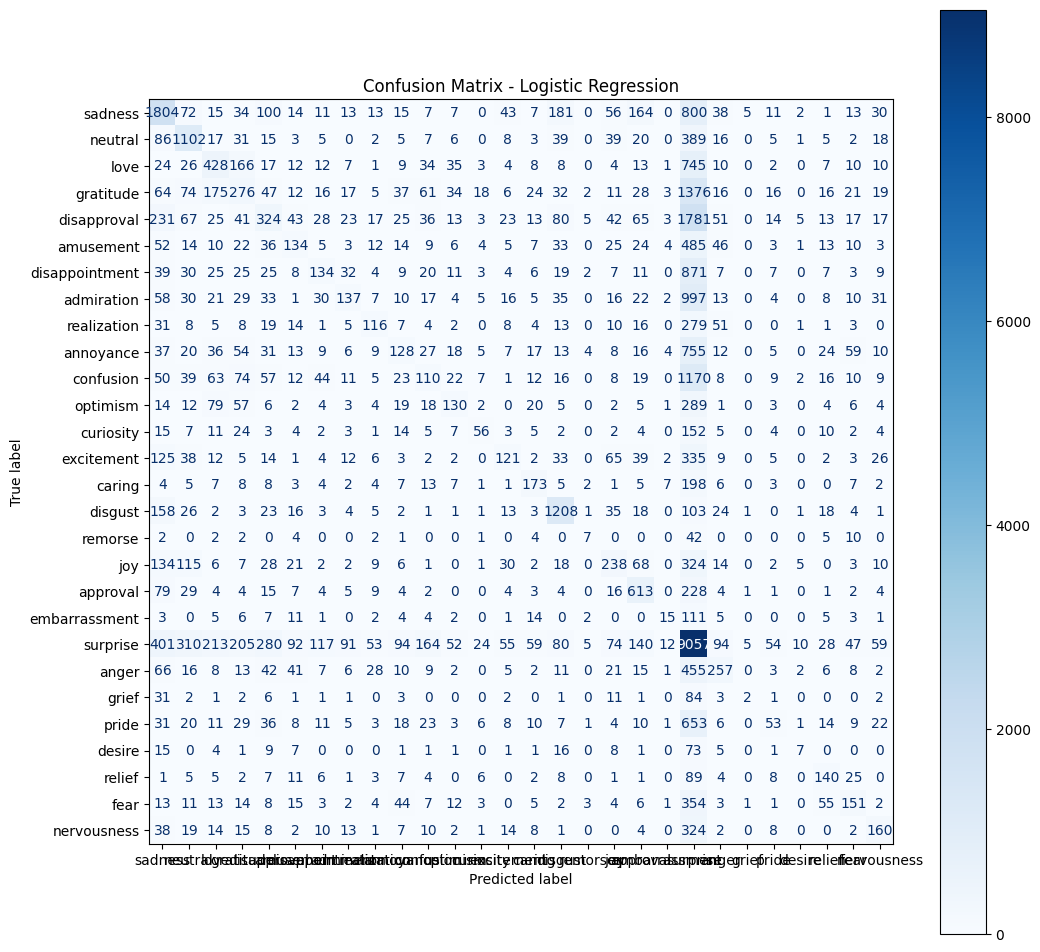

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

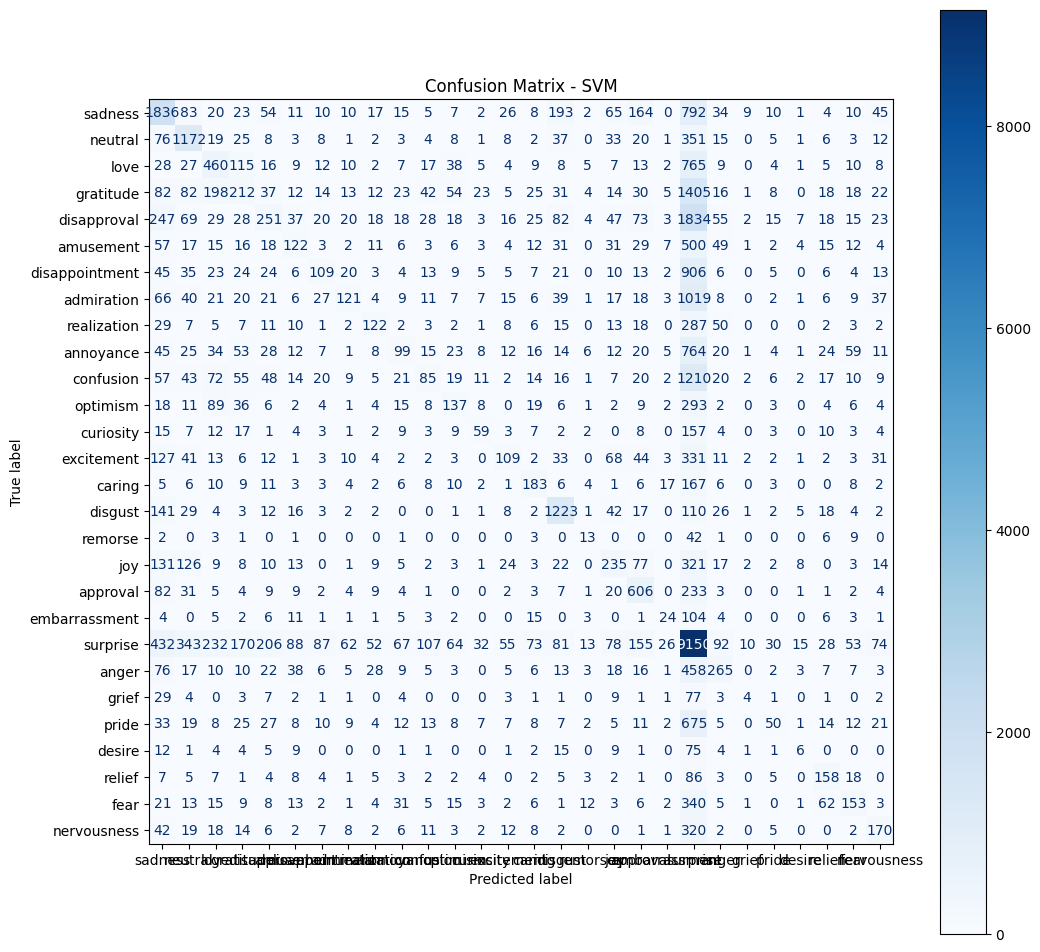

In [14]:
cm_svm = confusion_matrix(y_test, svm_pred)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=y.unique())
fig, ax = plt.subplots(figsize=(12, 12))
disp_svm.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()

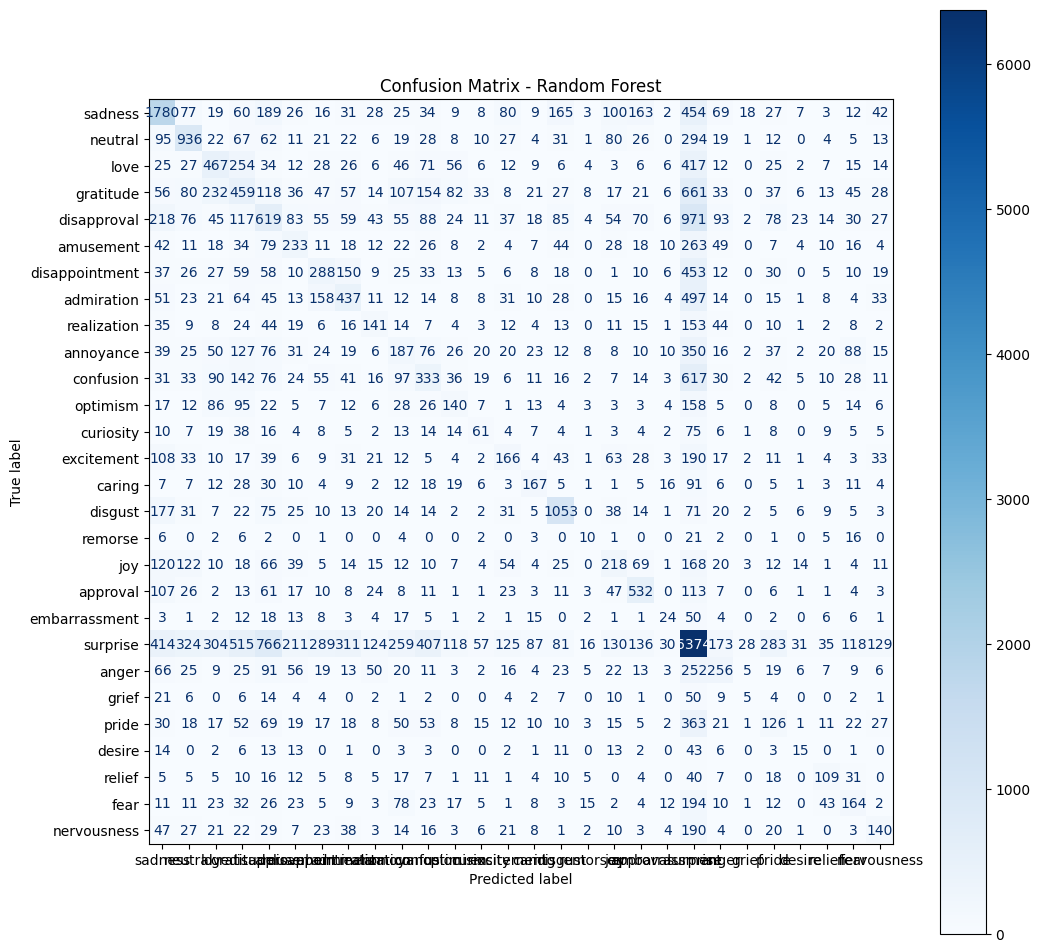

In [15]:
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=y.unique())
fig, ax = plt.subplots(figsize=(12, 12))
disp_rf.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to calculate metrics
def get_metrics(y_true, y_pred, average='weighted'):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average=average, zero_division=0),
        'Recall': recall_score(y_true, y_pred, average=average, zero_division=0),
        'F1-score': f1_score(y_true, y_pred, average=average, zero_division=0)
    }

# Collect metrics
metrics = {
    'Logistic Regression': get_metrics(y_test, y_pred),
    'SVM': get_metrics(y_test, svm_pred),
    'Random Forest': get_metrics(y_test, rf_pred)
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics).T
metrics_df = metrics_df.round(4)
metrics_df

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.4043,0.3674,0.4043,0.3543
SVM,0.4056,0.3684,0.4056,0.3494
Random Forest,0.3655,0.3526,0.3655,0.3579


In [17]:
# Highlight the best model per metric
best_models = metrics_df.idxmax()
best_values = metrics_df.max()

comparison_summary = pd.DataFrame({
    'Best Model': best_models,
    'Score': best_values
})
comparison_summary

,Best Model,Score
Accuracy,SVM,0.4056
Precision,SVM,0.3684
Recall,SVM,0.4056
F1-score,Random Forest,0.3579
